In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.formula.api import ols

sns.set(style="whitegrid")

In [2]:
# IMPORT CSV FILE
df_old = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
# RENAME COLUMNS TO MAKE IT EASIER
df_new = df_old.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df_new.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# SELECT ONLY "YES" VALUES FROM ASD_TRAITS FOR OUR TARGET VARIABLE
df_new = df_new[df_new['asd_traits'] != 'No']
df_new.shape

(728, 19)

In [5]:
# CREATE DUMMY VARIABLES OF CATEGORICAL VARIABLES FOR REGRESSION
df_new = pd.get_dummies(df_new, columns=['Ethnicity','Jaundice','Sex','family_asd'], drop_first=True)
df_new.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'qchat_score', 'Who completed the test', 'asd_traits',
       'Ethnicity_Latino', 'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_south asian', 'Jaundice_yes', 'Sex_m', 'family_asd_yes'],
      dtype='object')

In [6]:
# CHANGE NAMES OF COLUMNS WITH SPACES TO MAKE IT EASIER
df = df_new.rename(columns={'Ethnicity_Native Indian': 'Ethnicity_Native_Indian', 'Ethnicity_White European':'Ethnicity_White_European', 'Ethnicity_middle eastern':'Ethnicity_middle_eastern', 'Who completed the test':'Who_completed_the_test','Ethnicity_south asian':'Ethnicity_south_asian'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Who_completed_the_test,asd_traits,Ethnicity_Latino,Ethnicity_Native_Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White_European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle_eastern,Ethnicity_mixed,Ethnicity_south_asian,Jaundice_yes,Sex_m,family_asd_yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,family member,Yes,0,0,0,0,1,0,0,0,0,0,1,1,0
2,3,1,0,0,0,0,0,1,1,0,1,36,4,family member,Yes,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4,1,1,1,1,1,1,1,1,1,1,24,10,family member,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1,1,0,1,1,1,1,1,1,1,20,9,family member,Yes,0,0,0,0,1,0,0,0,0,0,0,0,1
5,6,1,1,0,0,1,1,1,1,1,1,21,8,family member,Yes,0,0,0,0,0,0,1,0,0,0,0,1,0


In [7]:
# SELECT COLUMNS FOR OUR FEATURES AND CREATE DATAFRAME, SELECT 'AGE' COLUMN AS TARGET TO MAKE IT EASIER TO CALL FOR REGRESSION
features = ['qchat_score','Ethnicity_Latino', 'Ethnicity_Native_Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White_European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle_eastern', 'Ethnicity_mixed',
       'Ethnicity_south_asian', 'Jaundice_yes', 'Sex_m', 'family_asd_yes']
df_features = df[features]
target = df['Age']

In [8]:
# OLS MODEL OF FEATURES ON TARGET VARIABLE
mlr_model2=ols(formula='Age~qchat_score+Ethnicity_Latino+Ethnicity_Native_Indian+Ethnicity_Others+Ethnicity_Pacifica+Ethnicity_White_European+Ethnicity_asian+Ethnicity_black+Ethnicity_middle_eastern+Ethnicity_mixed+Ethnicity_south_asian+Jaundice_yes+Sex_m+family_asd_yes',data=df).fit()
mlr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.004
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.09e-06
Time:                        22:13:50   Log-Likelihood:                -2471.0
No. Observations:                 728   AIC:                             4972.
Df Residuals:                     713   BIC:                             5041.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   29.4380      1.745     16.866      0.000      26.011      32.865
qchat_score                 -0.5625      0.144     -3.905      0.000      -0.845      -0.280
Ethnicity_Latino             1.7613      2.121      0.830      0.407      -2.403       5.926
Ethnicity_Native_Indian      9.3076      4.418      2.107      0.035       0.633      17.982
Ethnicity_Others             4.6338      1.903      2.435      0.015       0.898       8.370
Ethnicity_Pacifica          -1.6690      3.070     -0.544      0.587      -7.697       4.359
Ethnicity_White_European     1.5074      1.413      1.067      0.287      -1.267       4.282
Ethnicity_asian              3.2391      1.438      2.253      0.025       0.416       6.062
Ethnicity_black             -0.0470      1.772     -0.027      0.979      -3.526       3.432
Ethnicity_middle_eastern     0.6937      1.532      0.453      0.651      -2.313       3.701
Ethnicity_mixed              3.5958      3.537      1.017      0.310      -3.348      10.539
Ethnicity_south_asian        3.1865      1.799      1.771      0.077      -0.345       6.719
Jaundice_yes                -1.3186      0.610     -2.160      0.031      -2.517      -0.120
Sex_m                        1.2957      0.619      2.094      0.037       0.081       2.511
family_asd_yes               0.3244      0.763      0.425      0.671      -1.173       1.822
==============================================================================
Omnibus:                       63.478   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.014
Skew:                          -0.549   Prob(JB):                     1.38e-11
Kurtosis:                       2.335   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# SPLIT INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=22,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (582, 14) Target:  (582,)
Training set - Features:  (146, 14) Target:  (146,)


In [10]:
# SCALE DATA
scaler = StandardScaler()

# FITTING SCALER TO TRAINING DATA
scaler.fit(X_train)

#TRANSFORMING THE TRAINING DATA
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#TRANSFORMING THE TESTING DATA
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [11]:
price_std = target.std()
#INSTANTIATING LINEAR REGRESSION OBJECT
lm = LinearRegression()
# FITTING OBJECT TO THE DATA
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error  Z:', train_rmse/price_std )
print('Training Root Mean Squared Error:' , train_rmse)

Mean Absolute Error  Z: 0.9617511970714124
Training Root Mean Squared Error: 7.205435341549565


### Evaluate on the test set

In [12]:
#FITTING MODEL TO PREDICT ON TEST AND MAKE PREDICTION ON THE TESTING SET
y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 7.2655733261667645
Training:  7 vs. Testing:  7


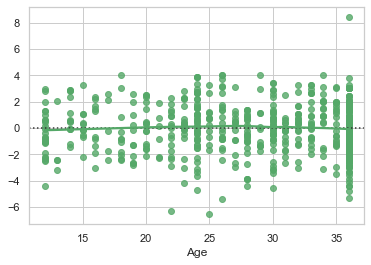

In [13]:
# PLOT RESIDUALS
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.




In [26]:
from sklearn.feature_selection import RFECV

In [27]:
ols = linear_model.LinearRegression()

In [28]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [29]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [30]:
list(removed_rfe)

['Ethnicity_Latino',
 'Ethnicity_Native_Indian',
 'Ethnicity_Others',
 'Ethnicity_Pacifica',
 'Ethnicity_White_European',
 'Ethnicity_black',
 'Ethnicity_middle_eastern',
 'Ethnicity_mixed',
 'Ethnicity_south_asian',
 'Jaundice_yes',
 'Sex_m',
 'family_asd_yes']

In [31]:
len(list(selected_rfe))

2

In [32]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 7.315157119204333
Testing Root Mean Squared Error: 7.4003516321928435
Original:  7.2655733261667645 vs. KBest:  7.276505085338307 vs. RFE:  7.4003516321928435


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

In [33]:
X_train.head()

,qchat_score,Ethnicity_Latino,Ethnicity_Native_Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White_European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle_eastern,Ethnicity_mixed,Ethnicity_south_asian,Jaundice_yes,Sex_m,family_asd_yes
0,0.116173,-0.173460,-0.058722,-0.202842,-0.102062,-0.715324,1.550325,-0.233126,-0.381666,-0.083189,-0.233126,-0.650371,0.618403,-0.410700
1,-0.940279,-0.173460,-0.058722,-0.202842,-0.102062,-0.715324,-0.645026,-0.233126,2.620089,-0.083189,-0.233126,-0.650371,0.618403,-0.410700
2,0.644400,-0.173460,-0.058722,-0.202842,-0.102062,-0.715324,-0.645026,-0.233126,2.620089,-0.083189,-0.233126,-0.650371,0.618403,2.434866
3,-0.940279,5.765006,-0.058722,-0.202842,-0.102062,-0.715324,-0.645026,-0.233126,-0.381666,-0.083189,-0.233126,-0.650371,-1.617067,-0.410700
4,-1.468506,-0.173460,-0.058722,-0.202842,-0.102062,-0.715324,1.550325,-0.233126,-0.381666,-0.083189,-0.233126,-0.650371,0.618403,-0.410700


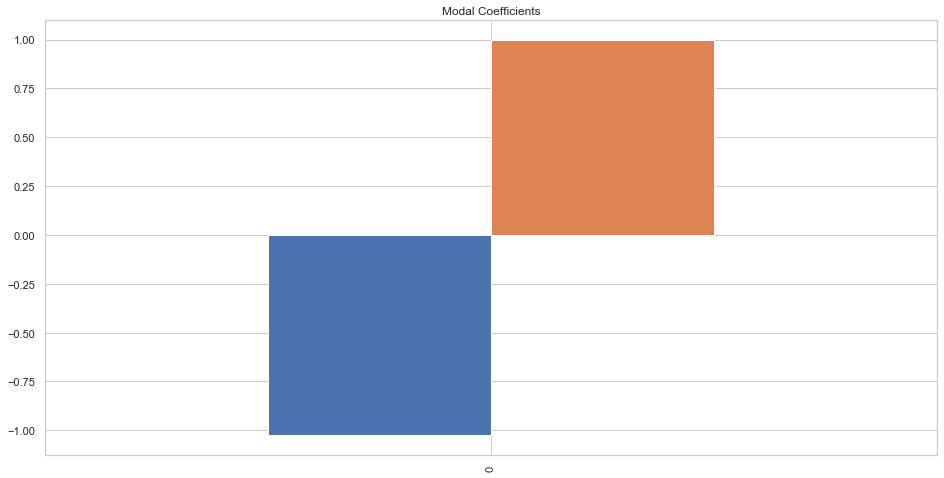

In [34]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [35]:
coef.T

,0
qchat_score,-1.025951
Ethnicity_asian,0.997238


In [36]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 6.100591611216029
Testing Error: 7.267835174113706


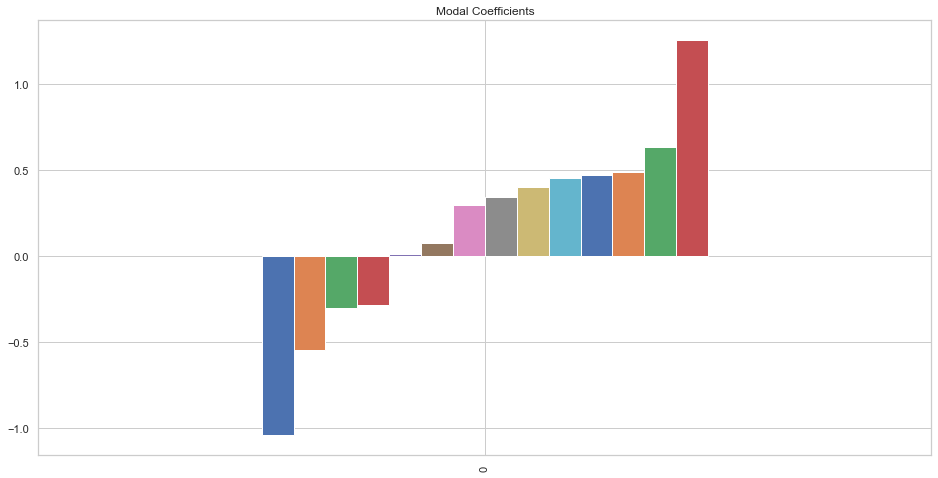

In [37]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [38]:
lasso_coef01.T

,0
qchat_score,-1.040125
Jaundice_yes,-0.544212
Ethnicity_Pacifica,-0.298843
Ethnicity_black,-0.286424
Ethnicity_middle_eastern,0.012131
family_asd_yes,0.077866
Ethnicity_Latino,0.296554
Ethnicity_mixed,0.343378
Ethnicity_south_asian,0.402662
Ethnicity_White_European,0.452356


In [39]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )



Training Error: 6.120341966057782
Testing Error: 7.281923014795166


In [40]:
lasso_coef1 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef1.columns = X_train.columns

In [41]:
lasso_coef1.T

,0
qchat_score,-0.950953
Ethnicity_Latino,0.041662
Ethnicity_Native_Indian,0.323238
Ethnicity_Others,0.358305
Ethnicity_Pacifica,-0.323064
Ethnicity_White_European,0.000000
Ethnicity_asian,0.782348
Ethnicity_black,-0.403438
Ethnicity_middle_eastern,-0.205790
Ethnicity_mixed,0.158228


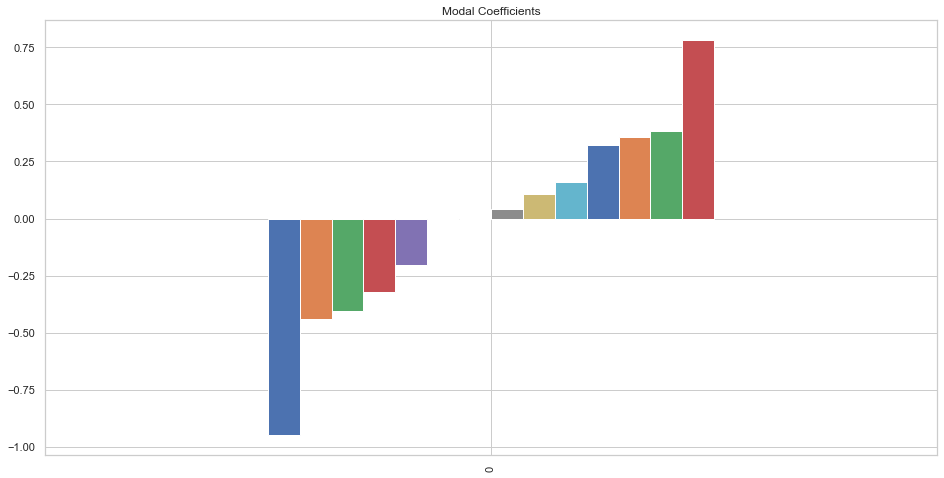

In [42]:
lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))